## Data Cleaning and EDA

In [58]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns


In [59]:
movie_details_df = pd.read_csv('./data/movie_details_df.csv')

In [60]:
movie_finder_df = pd.read_csv('./data/movie_finder_df.csv')

### Evaluating Missing Information

I noticed many nan values for selftext and decided to replace nan values with an empty string and then combine the selftext column with title column to have more langauge data and not lose these rows.

Many of the posts in selftext columns looks like spam with the caption:
'🔴🔴 visite this Link to watch porn vidéos 👇👇' 

I will drop the rows/posts with the spam.

In [61]:
movie_details_df 

,Unnamed: 0,subreddit,selftext,title
0,0,MovieDetails,NaN,"In Almost Famous (2000), Lester Bangs wears a ..."
1,1,MovieDetails,&amp;#x200B;\n\nhttps://preview.redd.it/sjy87p...,In Better Watch Out (2016) We see from the add...
2,2,MovieDetails,NaN,In The Mitchell’s VS The Machines (2021) a min...
3,3,MovieDetails,&amp;#x200B;\n\nhttps://preview.redd.it/bki3t3...,In Better Watch Out (2016) We see from the add...
4,4,MovieDetails,NaN,🔴🔴 visite this Link to watch porn vidéos 👇👇
...,...,...,...,...
995,95,MovieDetails,NaN,In both Wall Street (1987) and the sequel Wall...
996,96,MovieDetails,NaN,Scarlett Johansson’s characters adore the same...
997,97,MovieDetails,NaN,Which Titan Won in Godzilla Vs Kong!?
998,98,MovieDetails,NaN,"In The Life Aquatic with Steve Zissou (2004), ..."


In [62]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   subreddit   1000 non-null   object
 2   selftext    165 non-null    object
 3   title       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [63]:
movie_details_df.drop(['Unnamed: 0','selftext'], axis =1, inplace = True)

In [64]:
movie_details_df = movie_details_df[movie_details_df['title'] != '🔴🔴 visite this Link to watch porn vidéos 👇👇' ]

In [65]:
movie_details_df = movie_details_df[movie_details_df['title'] != '🔴🔴 visite this Link to watch porn vidéos👇👇' ]

In [66]:
movie_details_df.isna().sum()

subreddit    0
title        0
dtype: int64

In [67]:
movie_finder_df.head(15) 
# will add selftext information to title to add more information for the model 

,Unnamed: 0,subreddit,selftext,title
0,0,moviefinder,Cannot find [this flick](https://www.imdb.com/...,Scoumoune (1972)
1,1,moviefinder,I remember watching the land before time as a ...,I know it exists somewhere
2,2,moviefinder,NaN,Any ideas what this is from?
3,3,moviefinder,Family on a secret really show where people vo...,Family is on a secret reality show (kids/famil...
4,4,moviefinder,I remember an animated movie about forest anim...,Pls help me remember my childhood
5,5,moviefinder,American movie. By southern house I mean somet...,Two kids (like 11 y.o.) are trying to get a ba...
6,6,moviefinder,It was about this white kid that wants to be a...,Movie about aspiring DJ named DJ Ghost
7,7,moviefinder,I watched this movie on Netflix between 2014-2...,This Movie is Out There... Somewhere?
8,8,moviefinder,Does anyone know the name of this movie? There...,AI/human/robot movie? This woman was an amazin...
9,9,moviefinder,I watch this til tok video about this movie an...,I need help


In [68]:
movie_finder_df['selftext'] = movie_finder_df['selftext'].replace(np.nan, '')

In [69]:
movie_finder_df['title'] = movie_finder_df['title'] + movie_finder_df['selftext']

In [70]:
movie_finder_df.drop(['selftext', 'Unnamed: 0'], axis = 1, inplace = True)

In [71]:
movie_finder_df.isna().sum()

subreddit    0
title        0
dtype: int64

### Combine all Data 

Below I will combine both subreddit dataframes into one large data drame and then make the subreddit column binary to do classification modeling

In [72]:
full_movie_data = pd.concat([movie_finder_df, movie_details_df])

In [73]:
full_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1982 non-null   object
 1   title      1982 non-null   object
dtypes: object(2)
memory usage: 46.5+ KB


In [74]:
full_movie_data.head()

,subreddit,title
0,moviefinder,Scoumoune (1972)Cannot find [this flick](https...
1,moviefinder,I know it exists somewhereI remember watching ...
2,moviefinder,Any ideas what this is from?
3,moviefinder,Family is on a secret reality show (kids/famil...
4,moviefinder,Pls help me remember my childhoodI remember an...


In [75]:
full_movie_data.shape

(1982, 2)

In [76]:
full_movie_data.isna().sum()

subreddit    0
title        0
dtype: int64

In [77]:
full_movie_data['subreddit'].value_counts()

moviefinder     1000
MovieDetails     982
Name: subreddit, dtype: int64

In [78]:
full_movie_data['subreddit'] = np.where(full_movie_data.subreddit == 'moviefinder', 1, 0)

In [79]:
full_movie_data['subreddit'].value_counts()

1    1000
0     982
Name: subreddit, dtype: int64

### Key for subreddits: 
#### moviefinder = 1
#### MovieDetails = 0

### EDA

Will create a post length column and evaluate the post length in comparison to each subreddit and the amount of posts per subreddit

In [80]:
full_movie_data.head()

,subreddit,title
0,1,Scoumoune (1972)Cannot find [this flick](https...
1,1,I know it exists somewhereI remember watching ...
2,1,Any ideas what this is from?
3,1,Family is on a secret reality show (kids/famil...
4,1,Pls help me remember my childhoodI remember an...


In [81]:
full_movie_data['post_length'] = full_movie_data['title'].str.len()

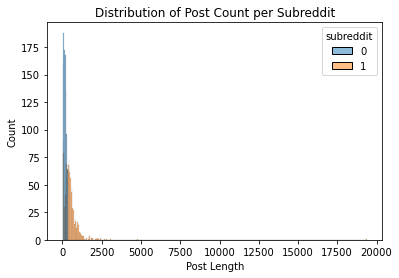

In [82]:
plt.title('Distribution of Post Count per Subreddit')
plt.xlabel('Post Length')
sns.histplot(x = 'post_length', hue = 'subreddit', data = full_movie_data);

Movie finder subreddit in comparison to movie details subreddit has longer posts with more words. This is likely because movie facts are short descriptions while move finder is using longer descriptions to try to identify movies. 

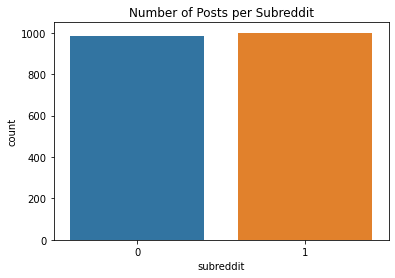

In [83]:
plt.title('Number of Posts per Subreddit')
sns.countplot(x = 'subreddit',data = full_movie_data);

About equal posts per subreddit which will be good for our modeling. No need to get more data and do not need to use a balanced accuracy score.

In [85]:
full_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    1982 non-null   int64 
 1   title        1982 non-null   object
 2   post_length  1982 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 101.9+ KB


In [84]:
full_movie_data.to_csv('./data/full_movie_data_clean.csv')